Eng. Luiz Gonzaga Rocha Júnior

Algoritmo para previsão de Carga

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
from fbprophet import Prophet
from datetime import datetime
import time

In [2]:
#Inicia
inicio = time.time()

In [3]:
## load the dataset
df = pd.read_csv('COS-MERC.csv', engine='python', delimiter=";")
df.columns = ['ds','y']

df['ds'] = pd.to_datetime(df['ds'])
df = df.sort_values(['ds'])
df['y'] = pd.to_numeric(df['y'],errors='coerce')
df['y'].fillna(method ='pad', inplace=True) 

df = df[['ds','y']]

In [4]:
m = Prophet()
#m = Prophet(growth='logistic', holidays = holidays)
m.add_country_holidays(country_name='BR') #Adiciona feriados nacionais do Brasil

In [5]:
m.train_holiday_names

In [6]:
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [7]:
# Python
n_steps = 96*3 # número de periodos 
future = m.make_future_dataframe(periods=n_steps, freq='15min')
#future['cap'] = 2400
future.tail()

,ds
105498,2018-01-03 22:45:00
105499,2018-01-03 23:00:00
105500,2018-01-03 23:15:00
105501,2018-01-03 23:30:00
105502,2018-01-03 23:45:00


In [8]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
105498,2018-01-03 22:45:00,1477.117321,1232.215291,1699.457815
105499,2018-01-03 23:00:00,1441.440637,1202.913467,1696.642025
105500,2018-01-03 23:15:00,1405.199042,1164.061149,1654.905335
105501,2018-01-03 23:30:00,1369.221985,1139.537781,1626.476850
105502,2018-01-03 23:45:00,1334.280845,1087.383932,1564.618144


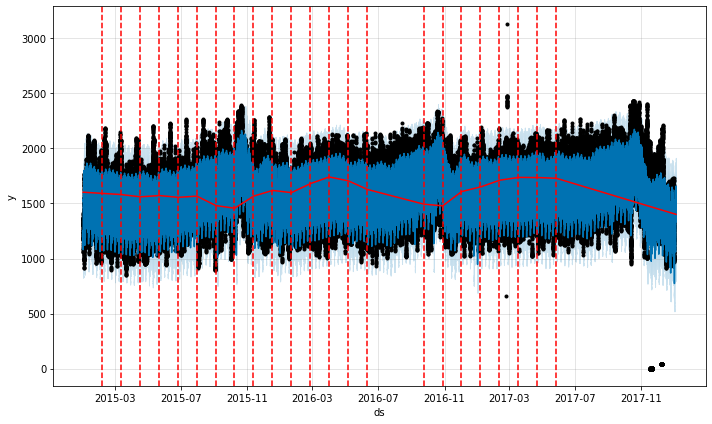

In [9]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [10]:
# Cálculo da acurácia
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('r2_squared = %.2f' % r2_score(df.y, forecast.yhat[:-n_steps]))
print('mse = %.2f' % mean_squared_error(df.y, forecast.yhat[:-n_steps]))
print('mae = %.2f' % mean_absolute_error(df.y, forecast.yhat[:-n_steps]))

r2_squared = 0.57
mse = 36868.15
mae = 135.21


In [11]:
#finaliza
fim = time.time()
print('Tempo total = %.2f min' % ((fim-inicio)/60))

Tempo total = 7.08 min


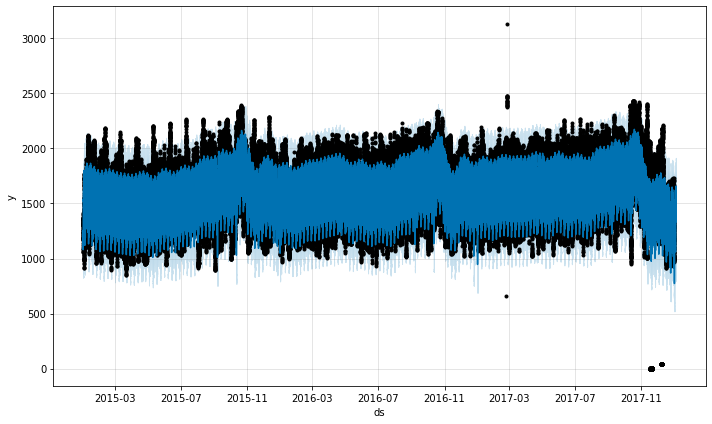

In [12]:
# Python
fig1 = m.plot(forecast)

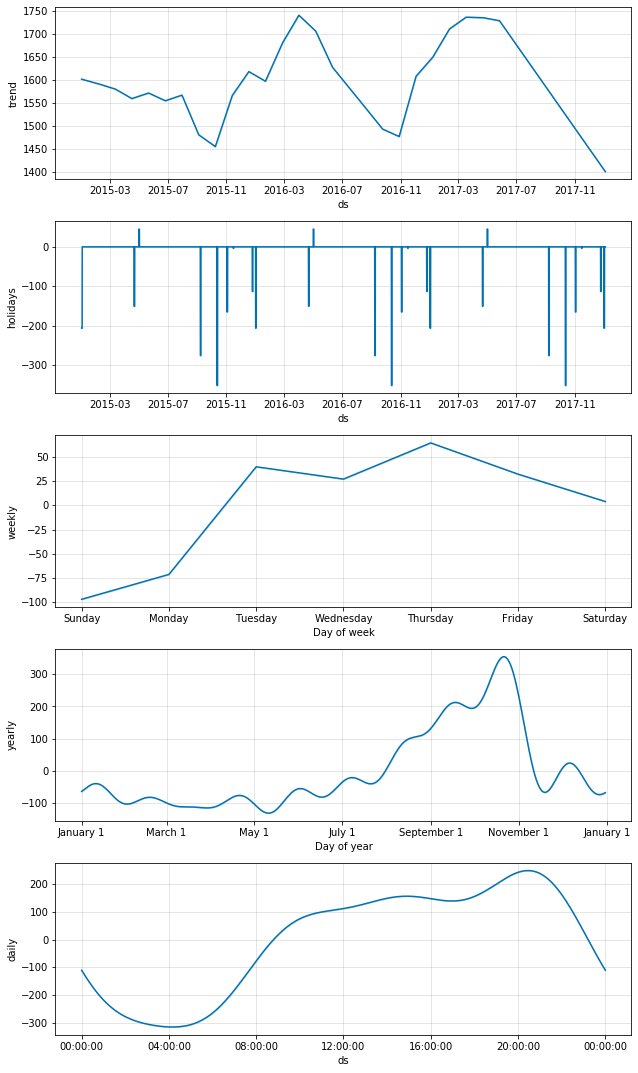

In [13]:
# Python
fig2 = m.plot_components(forecast)

In [14]:
df.tail()

,ds,y
105210,2017-12-31 22:45:00,1254.209961
105211,2017-12-31 23:00:00,1212.670044
105212,2017-12-31 23:15:00,1172.790039
105213,2017-12-31 23:30:00,1172.819946
105214,2017-12-31 23:45:00,1166.660034


In [15]:
forecast[['ds','yhat']][:-72].tail()

,ds,yhat
105426,2018-01-03 04:45:00,1066.017591
105427,2018-01-03 05:00:00,1070.981162
105428,2018-01-03 05:15:00,1078.115987
105429,2018-01-03 05:30:00,1087.668310
105430,2018-01-03 05:45:00,1099.818851


In [16]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='366 days', period='180 days', horizon = '365 days')


INFO:fbprophet:Making 3 forecasts with cutoffs between 2016-01-06 23:45:00 and 2016-12-31 23:45:00


In [17]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
105115,2017-12-31 22:45:00,2109.302256,-239.431128,4676.886523,1254.209961,2016-12-31 23:45:00
105116,2017-12-31 23:00:00,2074.856552,-208.623908,4608.447768,1212.670044,2016-12-31 23:45:00
105117,2017-12-31 23:15:00,2039.793754,-339.707578,4561.161759,1172.790039,2016-12-31 23:45:00
105118,2017-12-31 23:30:00,2004.964748,-351.898562,4569.677888,1172.819946,2016-12-31 23:45:00
105119,2017-12-31 23:45:00,1971.164896,-334.116068,4539.594082,1166.660034,2016-12-31 23:45:00


In [18]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 12:00:00,481205.958561,693.690103,402.668720,0.264456,0.100313,0.626237
1,36 days 12:15:00,481741.255126,694.075828,402.881435,0.264569,0.100320,0.626237
2,36 days 12:30:00,482300.923324,694.478886,403.099894,0.264680,0.100330,0.626237
3,36 days 12:45:00,482876.080139,694.892855,403.321214,0.264790,0.100334,0.626237
4,36 days 13:00:00,483459.439585,695.312476,403.546357,0.264900,0.100371,0.626237


In [19]:
df_p.count()

horizon     31537
mse         31537
rmse        31537
mae         31537
mape        31537
mdape       31537
coverage    31537
dtype: int64